**Importing required libraries**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


**Load the IRIS dataset**

In [43]:
iris=load_iris()

In [44]:
x=iris.data
y=iris.target

**Converting DataFrame(optional,for better readability)**

In [45]:
df=pd.DataFrame(x,columns=iris.feature_names)
df['species']=iris.target_names[y] 

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Display the graph to show how each feature relates to every other feature**

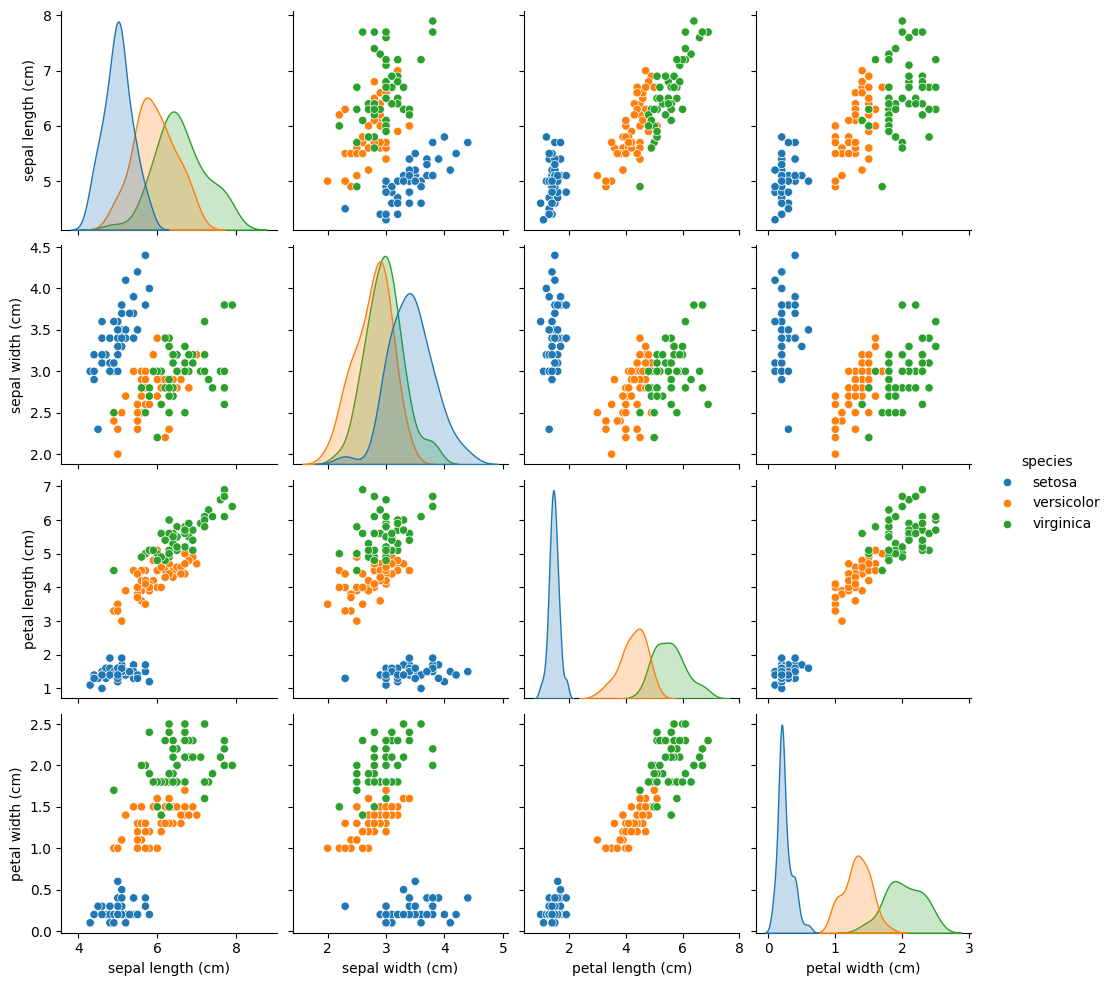

In [47]:
sns.pairplot(df,hue='species');

**Same graph but without Duplicates or similar comparisons**

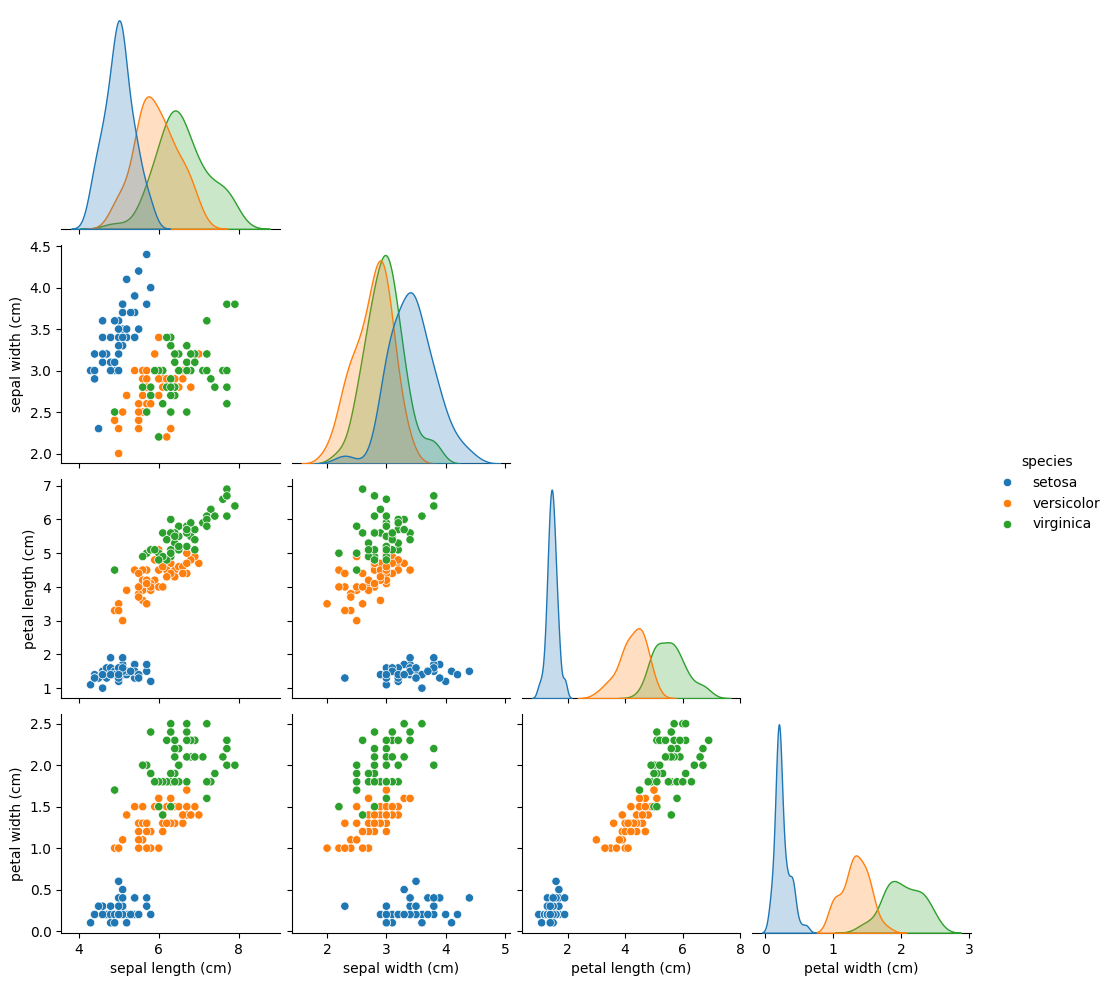

In [14]:
sns.pairplot(df,hue='species',corner=True)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

**Normalizing or standardizing the values into a similar scale and training the model(KNN)**

In [20]:
scaler=StandardScaler()
x_tscale=scaler.fit_transform(x_train)
x_testscale=scaler.transform(x_test)
model=KNeighborsClassifier(n_neighbors=3).fit(x_tscale,y_train)

In [21]:
y_pred=model.predict(x_testscale)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

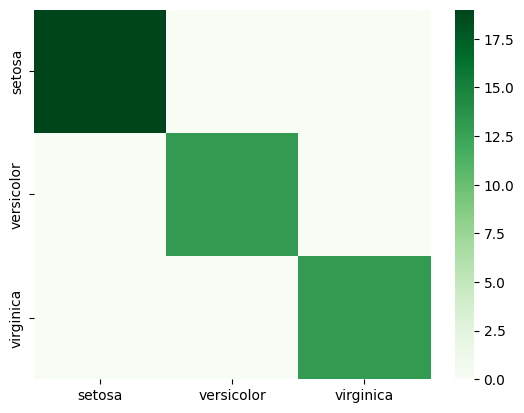

In [33]:
sns.heatmap(cm,fmt='d',cmap='Greens', xticklabels=iris.target_names,yticklabels=iris.target_names)

**Using Feature Importance to Find out which features (like petal length or sepal width) are most important when making predictions**

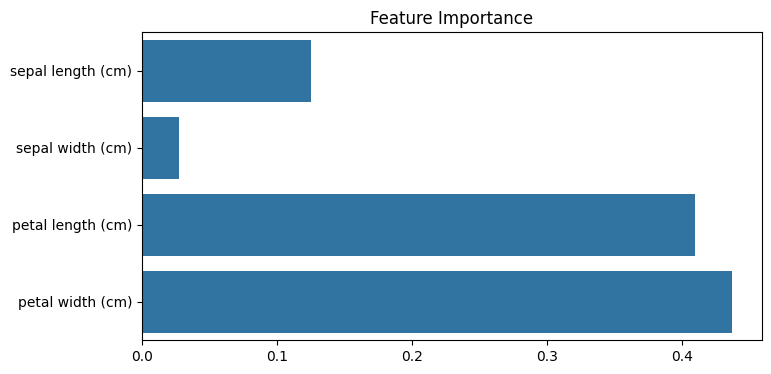

In [41]:
imp = models['Random Forest'].feature_importances_
features = iris.feature_names

plt.figure(figsize=(8,4))
sns.barplot(x=imp, y=features)
plt.title('Feature Importance')
plt.show()


**Comparing multiple machine learning models on the Iris dataset**

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(x_tscale, y_train)
    acc = model.score(x_testscale, y_test)
    print(f'{name} Accuracy: {acc:.3f}')


KNN Accuracy: 1.000
SVM Accuracy: 0.978
Random Forest Accuracy: 1.000
Logistic Regression Accuracy: 1.000
